In [ ]:
# !unzip -qq data.zip
# !mv data/* .

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from scipy import stats

In [ ]:
stock = pd.read_csv('../data/all_stocks_5yr.csv')
stock = stock.drop(['date', 'high', 'low', 'close', 'volume'], axis = 1)
COMPANY_NAMES = ['AAL', 'ZTS', 'AAPL', 'AKAM', 'IBM', 'NVDA']
stock



open Name
0       15.07  AAL
1       14.89  AAL
2       14.45  AAL
3       14.30  AAL
4       14.94  AAL
...       ...  ...
619035  76.84  ZTS
619036  77.53  ZTS
619037  76.64  ZTS
619038  72.74  ZTS
619039  72.70  ZTS

[619040 rows x 2 columns]

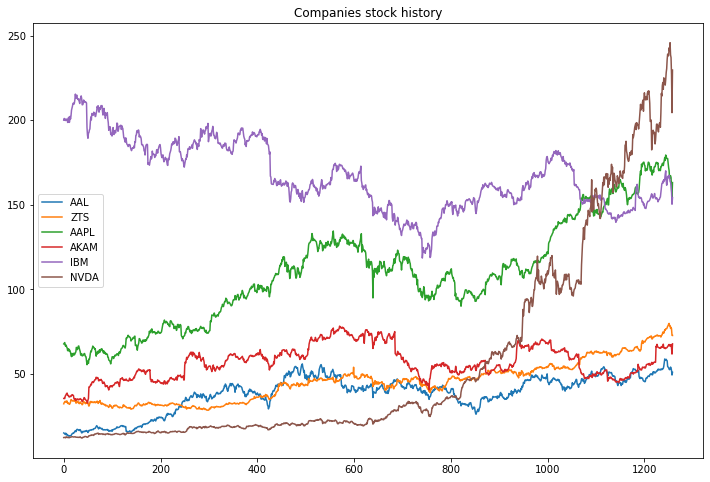

In [ ]:
plt.figure(figsize=(12, 8))

for company in COMPANY_NAMES:
    data_plot = stock[stock['Name'] == company]['open'].to_numpy()
    plt.plot(data_plot, label=company)

plt.title('Companies stock history')
plt.legend()
plt.show()

# Step 1 Histograms and kernel density 

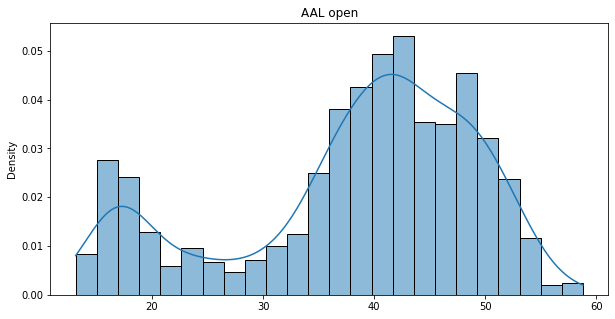

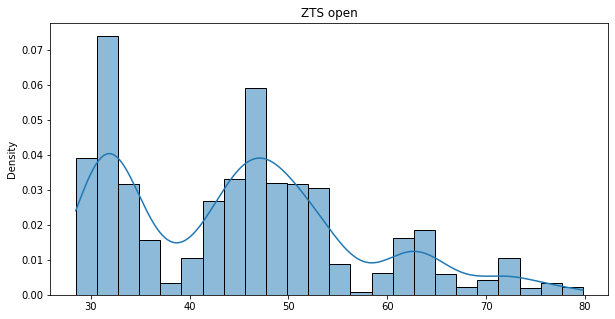

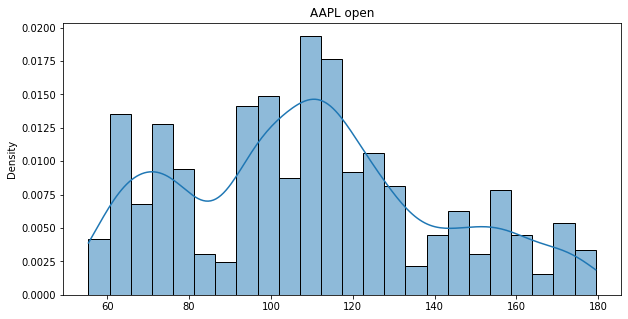

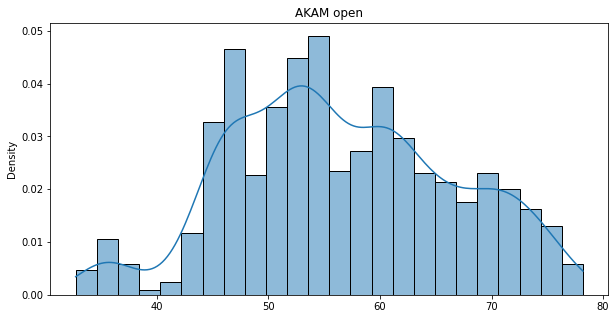

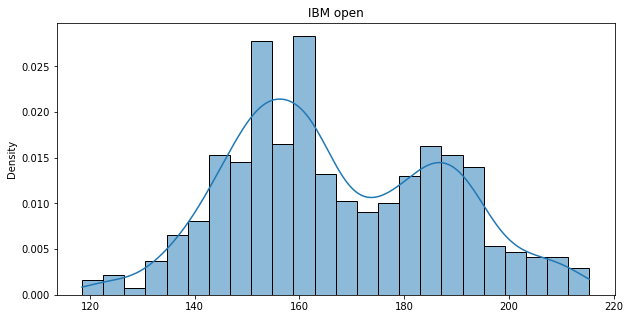

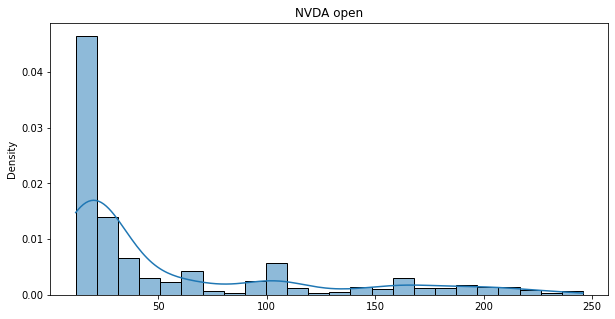

In [ ]:
# Temp example

for company in COMPANY_NAMES:
    data = stock.loc[stock.Name == company]
    data = data.drop(['Name'], axis = 1)
    for col in list(data):
        d = data[col].values.reshape(-1, 1)
        f, ax = plt.subplots(1, 1, figsize = (10, 5))
        hist_columns_count = int(1 + 3.32 * np.log(d.shape[0]))
        plot = sns.histplot(d, bins=hist_columns_count, kde=True, stat='density', ax=ax, legend = False)
        name = '{} {}'.format(company, col)
        ax.set_title(name)
        plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume

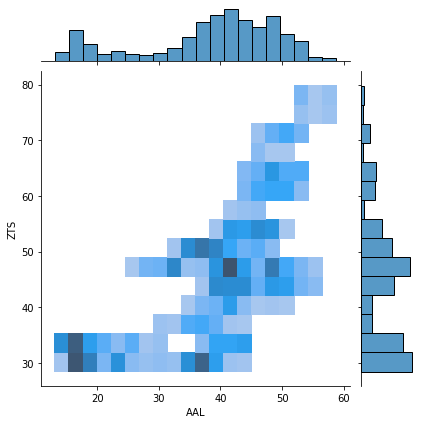

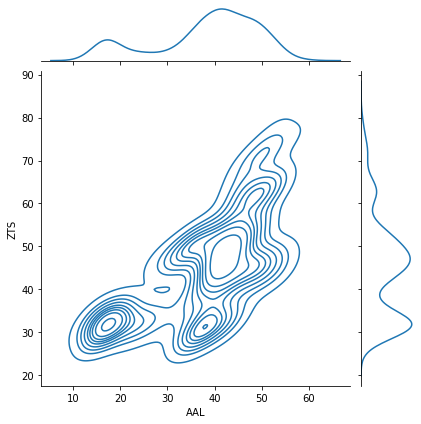

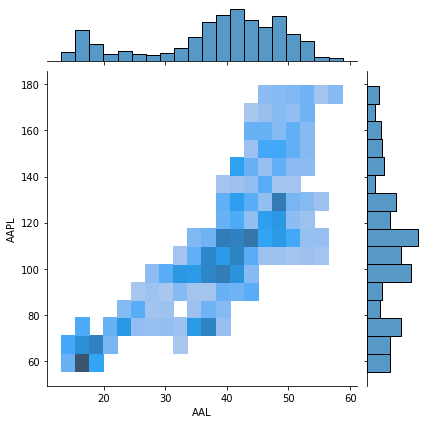

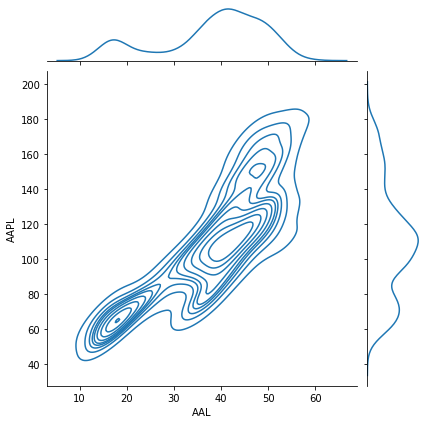

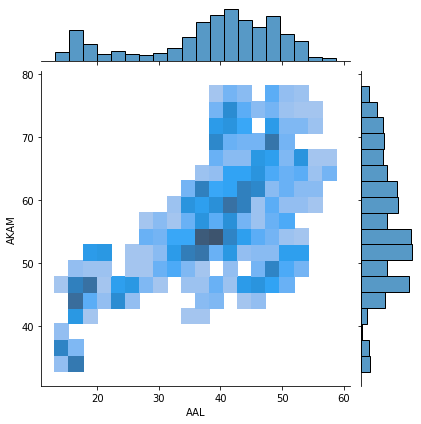

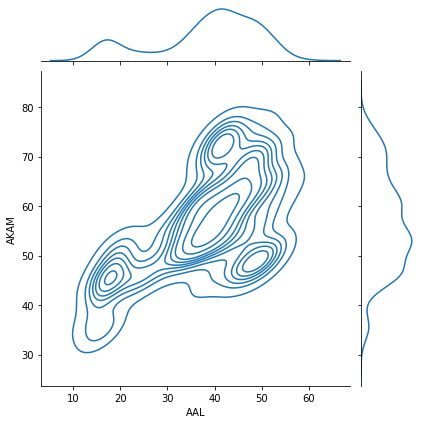

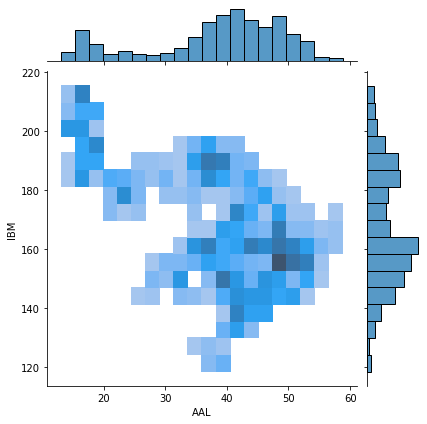

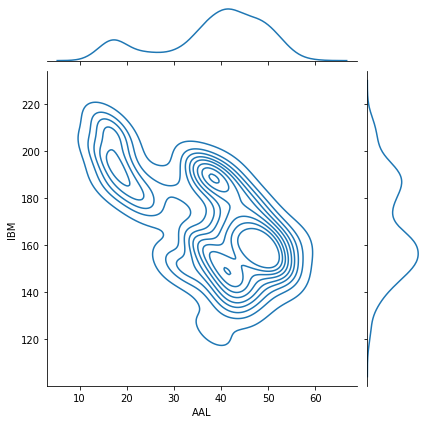

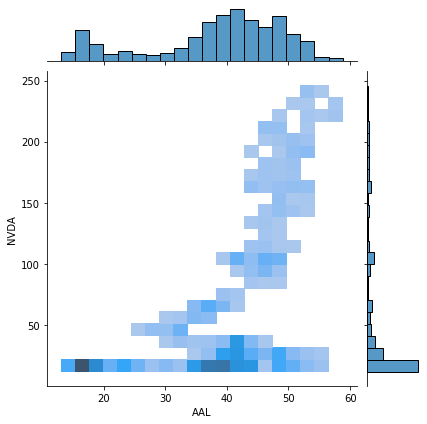

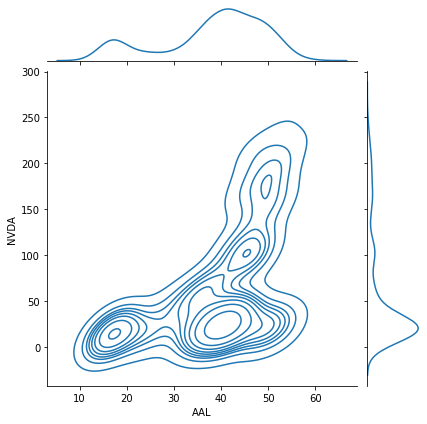

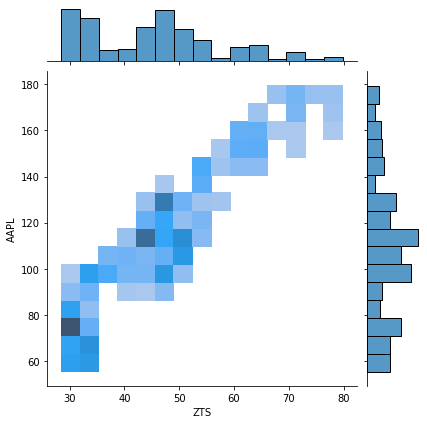

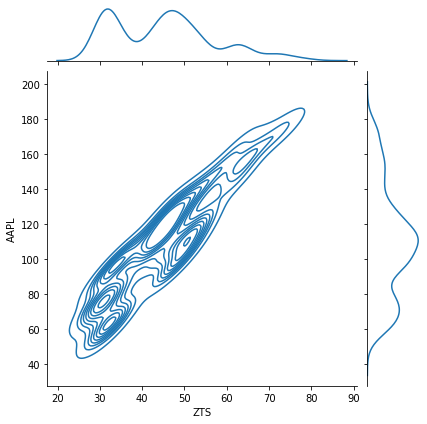

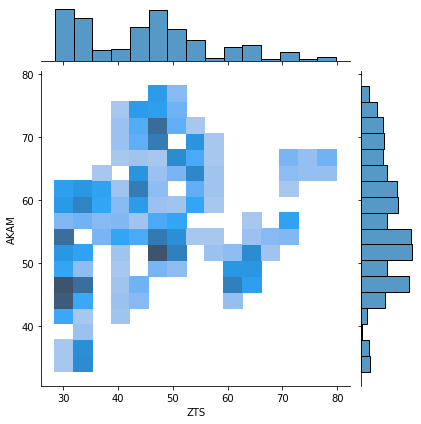

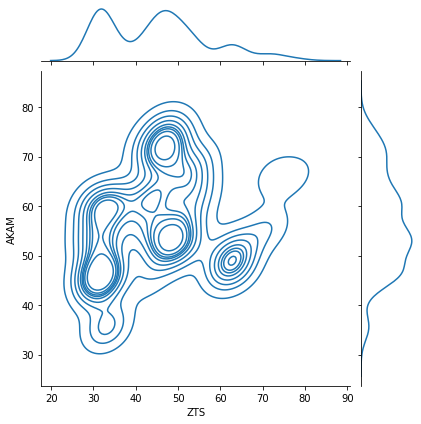

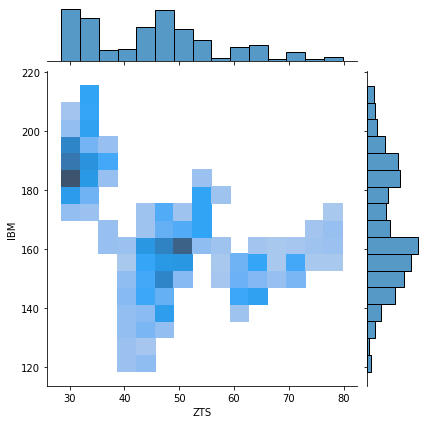

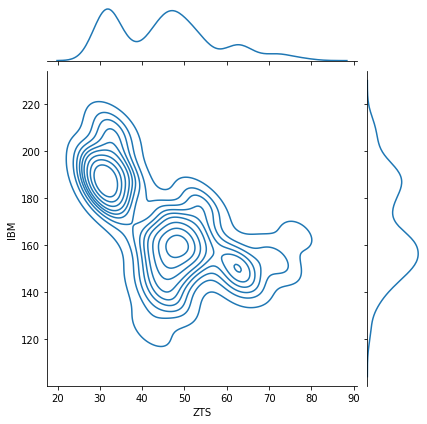

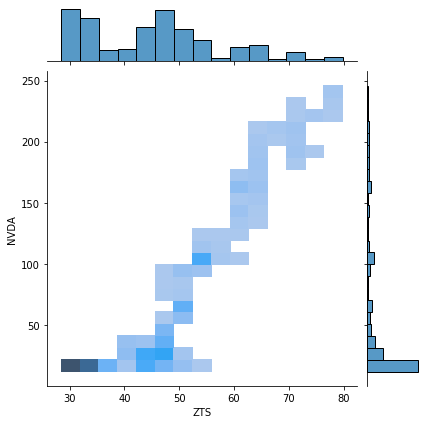

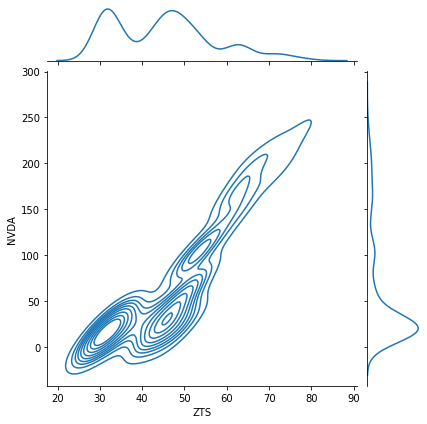

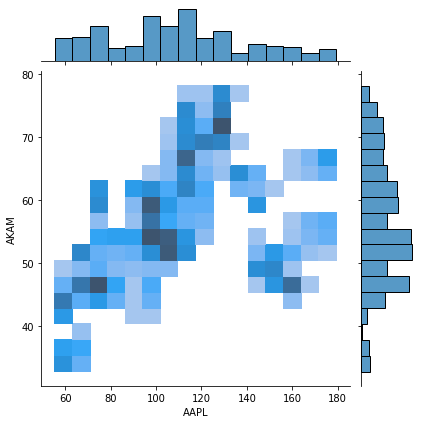

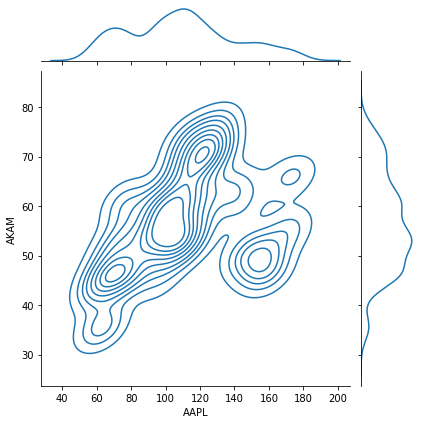

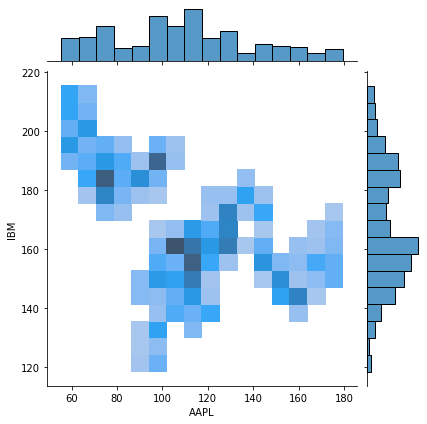

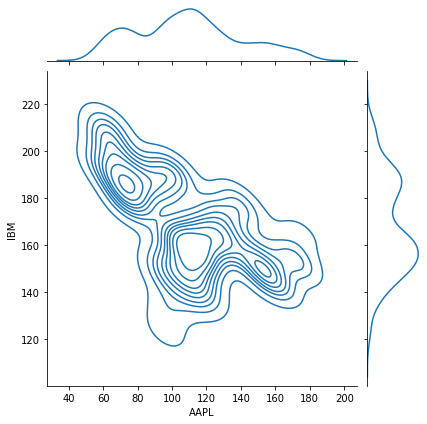

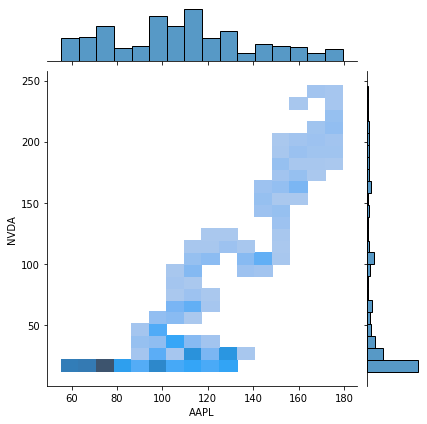

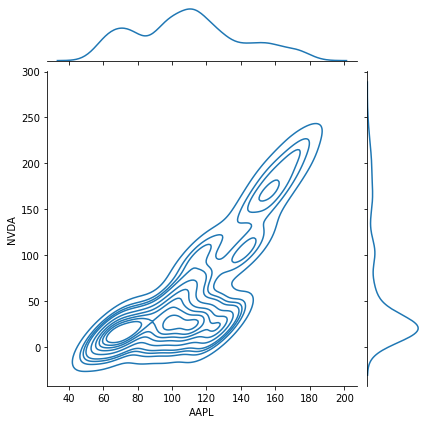

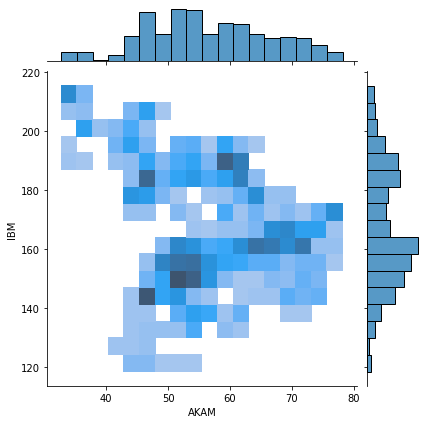

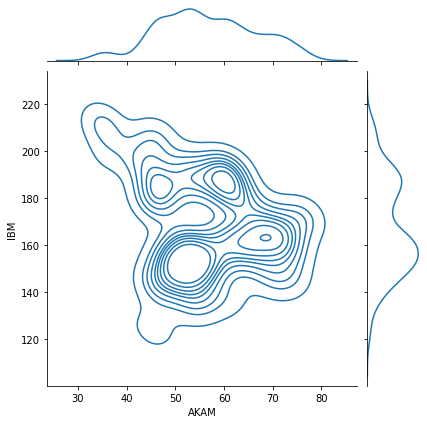

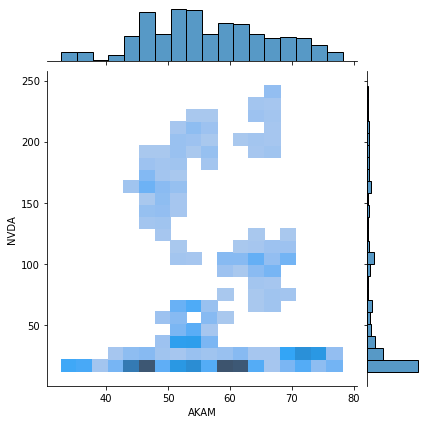

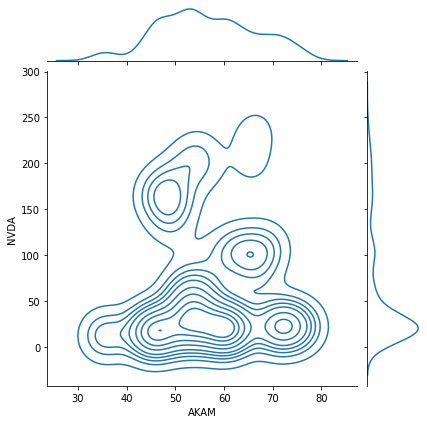

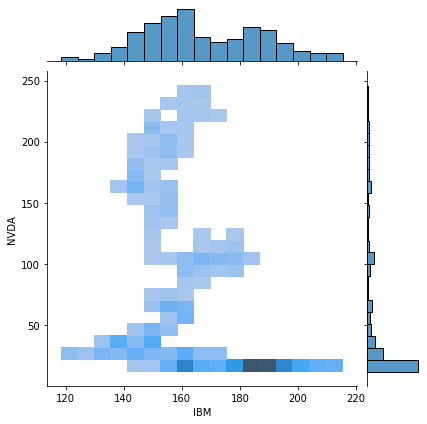

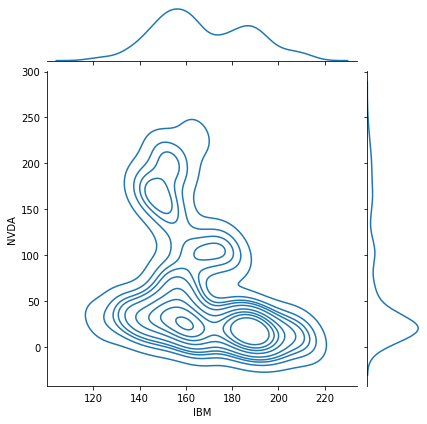

In [ ]:
for i in range(len(COMPANY_NAMES)):
    data1 = stock.loc[stock.Name == COMPANY_NAMES[i]]
    for j in range(i + 1, len(COMPANY_NAMES)):
        data2 = stock.loc[stock.Name == COMPANY_NAMES[j]]
        d = pd.DataFrame()
        d[data1.Name.values[0]] = data1.open.values.reshape(-1)
        d[data2.Name.values[0]] = data2.open.values.reshape(-1)
        sns.jointplot(data=d, x=data1.Name.values[0], y=data2.Name.values[0], kind = 'hist')
        sns.jointplot(data=d, x=data1.Name.values[0], y=data2.Name.values[0],  kind="kde")


# Step 2 Mean and variance

In [ ]:
for company in COMPANY_NAMES:
    data = stock.loc[stock.Name == company]
    data = data.drop(['Name'], axis = 1)
    for col in list(data):
        d = data[col].values.reshape(-1, 1)
        print('{} {} : Mean - {:.2f} Variance - {:.2f}'.format(company, col, np.mean(d), np.var(d)))

corr_df = pd.DataFrame()
for company in COMPANY_NAMES:
    data = stock.loc[stock.Name == company]
    data = data.drop(['Name'], axis = 1)
    corr_df[company] = data.values[:, 0]
corr = corr_df.cov()
corr.style.background_gradient(cmap='coolwarm')

AAL open : Mean - 38.39 Variance - 120.18
ZTS open : Mean - 45.09 Variance - 143.00
AAPL open : Mean - 109.06 Variance - 932.51
AKAM open : Mean - 56.61 Variance - 97.64
IBM open : Mean - 167.23 Variance - 407.11
NVDA open : Mean - 56.32 Variance - 3548.17


# Step 3 conditional distributions, mathematical expectations and variances.

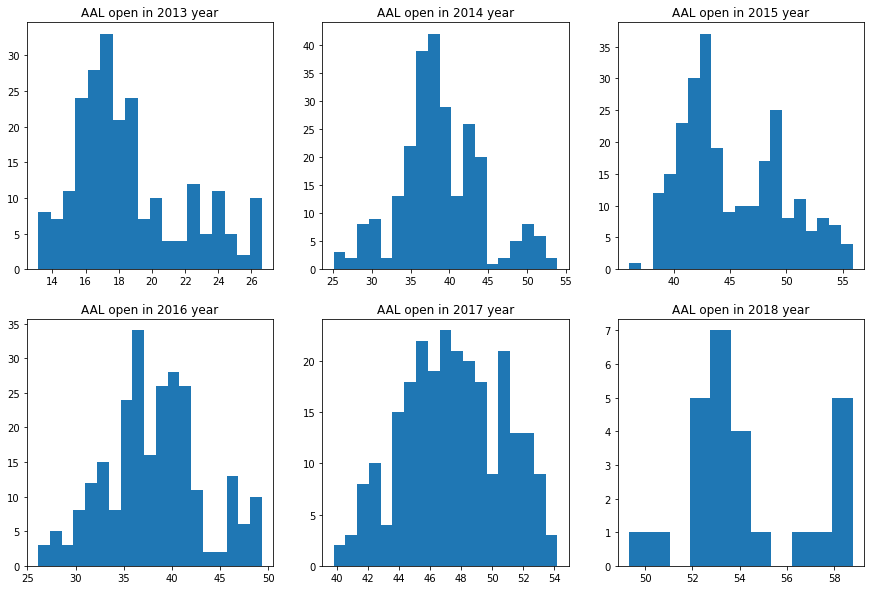

open_mean   open_var
date                      
2013  18.614336  10.859963
2014  38.861944  28.809968
2015  45.184325  20.408994
2016  38.154365  25.365527
2017  47.499935  10.177932
2018  54.221154   6.649115

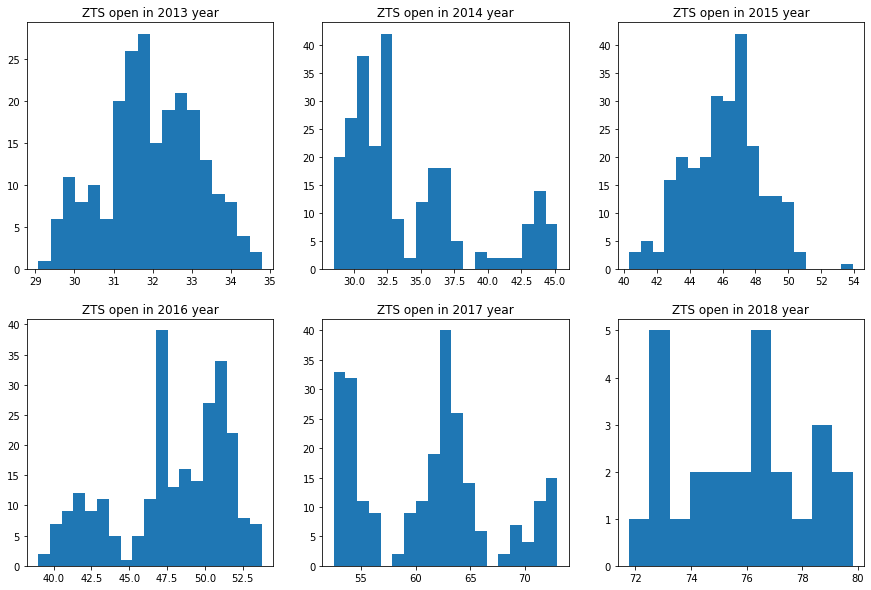

open_mean   open_var
date                      
2013  31.952434   1.483295
2014  34.028567  21.062999
2015  46.127460   5.066870
2016  47.825098  13.679709
2017  61.065797  36.146248
2018  75.771154   5.683339

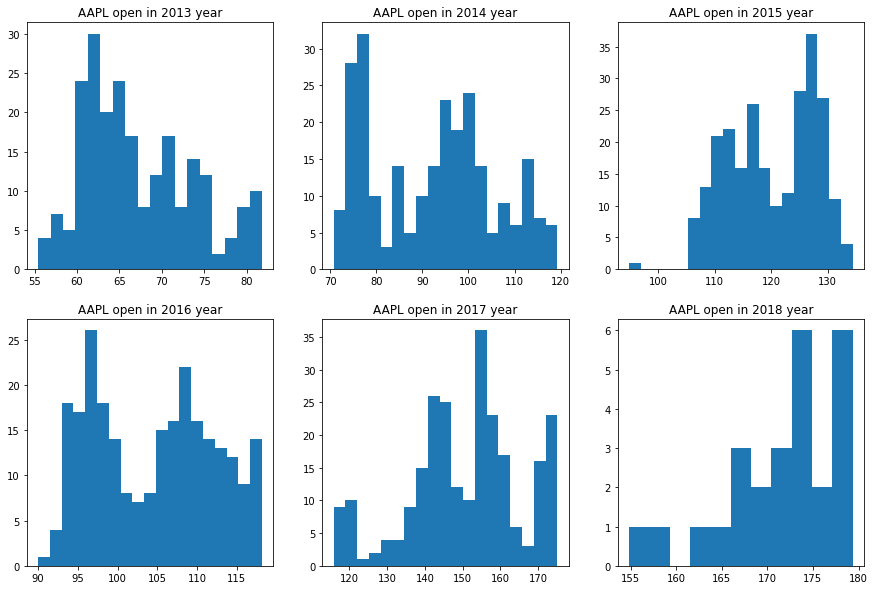

open_mean    open_var
date                        
2013   67.288005   42.369693
2014   92.219736  179.090556
2015  120.169206   59.131061
2016  104.507698   57.549444
2017  150.482560  217.720817
2018  171.716154   38.129941

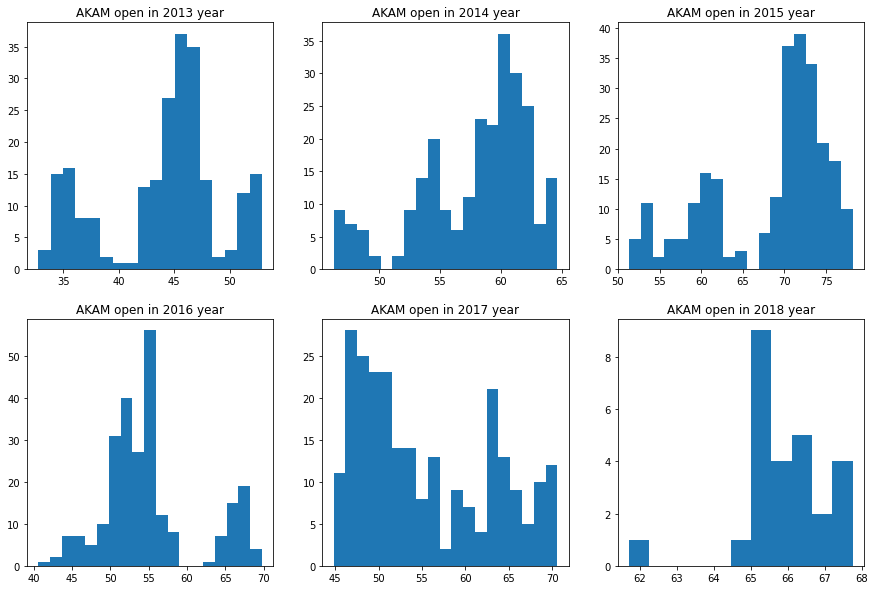

open_mean   open_var
date                      
2013  43.956526  27.356347
2014  57.858921  20.948069
2015  68.405198  48.921844
2016  55.135913  39.305878
2017  55.405637  58.151213
2018  65.895000   1.450418

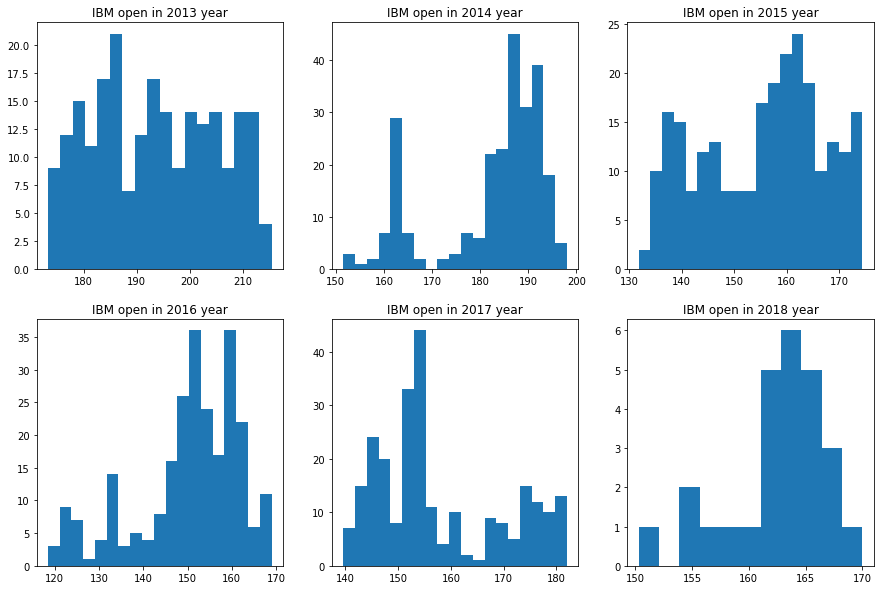

open_mean    open_var
date                        
2013  193.603120  133.293631
2014  182.261746  129.415673
2015  155.375040  132.362072
2016  150.342520  140.350484
2017  157.733171  145.923988
2018  162.598077   21.200608

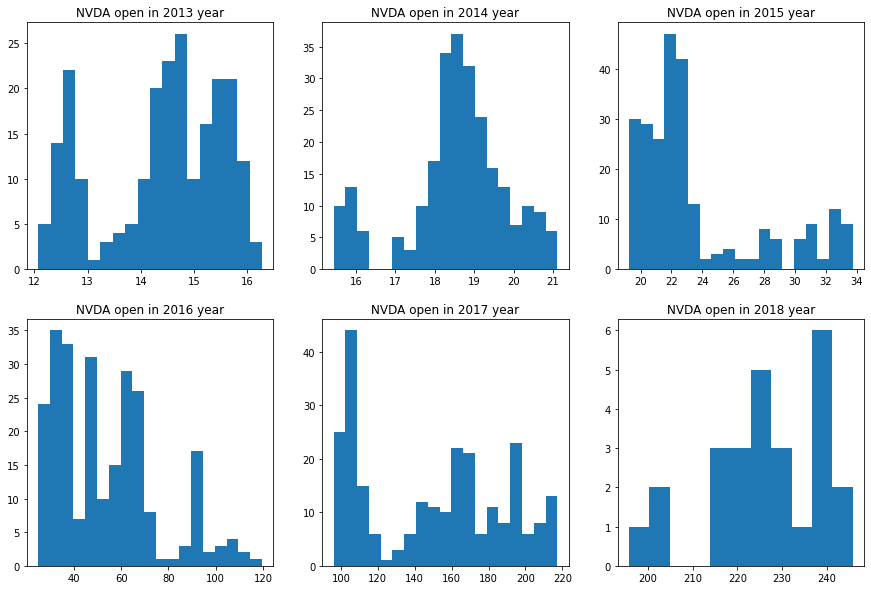

open_mean     open_var
date                         
2013   14.381527     1.319902
2014   18.543056     1.672581
2015   23.680516    16.862167
2016   53.630833   471.521276
2017  149.854207  1461.363827
2018  226.291923   160.953272

In [ ]:
stock = pd.read_csv('all_stocks_5yr.csv')
stock.date = stock.date.apply(lambda x: int(x.split('-')[0]))
stock = stock.drop(['high', 'low', 'close', 'volume'], axis = 1)

for c in COMPANY_NAMES:
    d = stock.loc[stock.Name == c]
    fig, axis = plt.subplots(2, 3, figsize = (15, 10))
    for i, date in enumerate(np.unique(d.date)):
        cond_data = d.loc[d.date == date]
        cond_data = cond_data.drop(['Name', 'date'], axis = 1)
        for col in list(cond_data):
            axis[i // 3, i % 3].hist(cond_data[col].values, bins = int(1 + 3.32 * np.log(cond_data.shape[0])))
            axis[i // 3, i % 3].set_title('{} {} in {} year'.format(c, col, date))
    plt.show()
    m = d.groupby('date').mean()
    m = m.rename({col: col + '_mean' for col in list(m)}, axis = 'columns')
    var = d.groupby('date').var()
    var = var.rename({col: col + '_var' for col in list(var)}, axis = 'columns')
    display(pd.merge(m, var, left_on = 'date', right_on = 'date'))


# Step 4

In [ ]:
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

stock = pd.read_csv('all_stocks_5yr.csv')
stock = stock.drop(['date', 'high', 'low', 'close', 'volume'], axis = 1)

print(COMPANY_NAMES)

for s, comp1 in enumerate(COMPANY_NAMES):
        for comp2 in list(COMPANY_NAMES)[s+1:]:
            d1 = stock.loc[stock.Name == comp1].open.values.reshape(-1)
            d2 = stock.loc[stock.Name == comp2].open.values.reshape(-1)

            print('{} open - {} open'.format(comp1, comp2))
            cor, p = stats.pearsonr(d1, d2)
            print('Correlation {} Interval ({}, {}) Significance {}'.format(cor, *r_confidence_interval(cor, 0.1, len(d1)), p))



['AAL', 'ZTS', 'AAPL', 'AKAM', 'IBM', 'NVDA']
AAL open - ZTS open
Correlation 0.6944251234859085 Interval (0.6696121865994613, 0.7176896442824029) Significance 7.033930171338914e-182
AAL open - AAPL open
Correlation 0.8351065488810872 Interval (0.8205069585057642, 0.8486173844813346) Significance 0.0
AAL open - AKAM open
Correlation 0.6360450325334167 Interval (0.6075894346867041, 0.6628699067490236) Significance 1.0888238137726018e-143
AAL open - IBM open
Correlation -0.6174141176228424 Interval (-0.6453144659591167, -0.5878688125278754) Significance 3.550855991634917e-133
AAL open - NVDA open
Correlation 0.5381001164376858 Interval (0.5043069235630745, 0.5702476587318213) Significance 2.035309172265121e-95
ZTS open - AAPL open
Correlation 0.9273965927952831 Interval (0.9206148361524942, 0.9336190179305264) Significance 0.0
ZTS open - AKAM open
Correlation 0.2642141555864993 Interval (0.22053768453644873, 0.3068331643536256) Significance 1.4903887646500435e-21
ZTS open - IBM open
Corr

# Part 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
stock = pd.read_csv('../data/all_stocks_5yr.csv')

In [ ]:
#stock = stock.drop(['date', 'volume'], axis=1)
stock = stock.dropna()

all_companies = set(stock["Name"].to_list())
all_companies.remove('A')

In [ ]:
def get_company_data(data, name):
    return data.loc[data.Name == name].drop(['Name'], axis=1)

## Building regression model

In [ ]:
tech_companies_X = ['CLX', 'NCLH', 'ANDV', 'AVB', 'EW', 'MNST', 'PNW', 'MKC', 'EQIX']
tech_companies_y = ['ED']

tech_comp_data_X = stock[stock.Name.isin(tech_companies_X)]
tech_comp_data_y = stock[stock.Name.isin(tech_companies_y)]
open_data = tech_comp_data_X[['open', 'Name','date']]

In [ ]:
train_companies_data = [get_company_data(open_data, company) for company in tech_companies_X]

merge = None
for i in range(1,len(tech_companies_X)) :
    if merge is None:
        merge = pd.merge(train_companies_data[i-1], train_companies_data[i], on='date', suffixes=(f'_{tech_companies_X[i-1]}', f'_{tech_companies_X[i]}'))
    else:
        merge = pd.merge(merge, train_companies_data[i], on='date', suffixes=(f'_{tech_companies_X[i-1]}', f'_{tech_companies_X[i]}'))

In [ ]:
merge.plot()

In [ ]:
X = merge.drop(['date'], axis=1)
y = tech_comp_data_y['open']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
mae_aic = mean_absolute_error(Y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
print('Mean absolute error with aic =', mae_aic)

In [ ]:
plt.plot(Y_test.values.reshape(-1, 1))
plt.plot(y_pred.reshape(-1, 1))

In [ ]:
plt.plot(Y_train.values.reshape(-1, 1))
plt.plot(reg.predict(X_train).reshape(-1, 1))

In [ ]:
stacked = np.hstack((X.to_numpy(), y.to_numpy().reshape(-1, 1)))
corr = np.corrcoef(stacked.T)
f, ax = plt.subplots(figsize=(10, 10))
labels = tech_companies_X + tech_companies_y
sns.heatmap(corr, annot=True, fmt= '.3f', ax = ax, cmap = 'Blues', xticklabels=labels, yticklabels=labels)

##  Multicollenearity and regularization

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [ ]:
plt.plot(Y_test.values.reshape(-1, 1))
plt.plot(y_pred.reshape(-1, 1))


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_temp = stacked[:, :-1]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp, i) for i in range(x_temp.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

## Analysis of the distribution of residuals

In [ ]:
y1 = np.array(Y_test)
y_pred_all = np.array(reg.predict(X_test))
y2 = np.array(y_pred_all)
y_diff = y1 - y2
sns.distplot(y_diff)

In [ ]:
from sklearn.metrics import r2_score

print(f"Coefficient of determination = {r2_score(Y_test, y_pred)}")

In [ ]:
import scipy.stats as st
st.kstest(y_diff, 'norm')